# Lab 4 (Due @ by 11:59 pm via Canvas/Gradescope)

## Group Work

You are encouraged to work in groups for this Lab, however each student should submit their own notebook file to Gradescope. While you will be able to do this on your own, talking through the problem with your group could help speed up both understanding and arriving at a solution. 

# Simple Linear Regression
## Baseball

There are many different features which may help predict the winning percentage of a sports team. One which may make the most sense is the point differential: how many more points one team scores than another. In this lab, you will conduct a Linear Regression to determine how well point differential in baseball predicts winning percentage.

In [1]:
# modules you'll need
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pylab as py
import scipy.stats as stats

In [2]:
# the data are read in and the two features of interest (x and y) are defined here for you
df_mlb = pd.read_csv('modern_mlb_teams.csv')
df_mlb['RunDiff'] = df_mlb['R'] - df_mlb['RA'] # a positive RunDiff (x) means that the team scored more than their opponents
df_mlb['WinPCT'] = df_mlb['W'] / (df_mlb['W'] + df_mlb['L']) # this is the teams winning percentage (y)

## Part 1: Reading Plots and Intuition (3 points)

Run the code below (you do not have to alter it in any way). In a markdown cell after you've run it, discuss in a couple sentences whether your intuition tells you that these two features are appropriate to analyze with the Linear Regression algorithm.

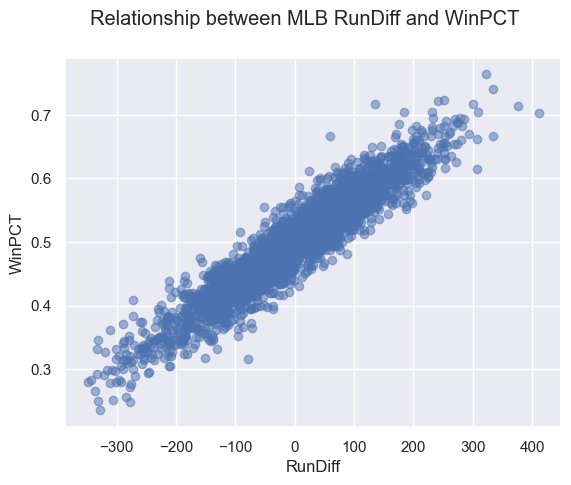

In [3]:
sns.set()

x = np.array(df_mlb['RunDiff']).reshape((-1,1))
y = np.array(df_mlb['WinPCT'])

plt.figure()
plt.scatter(x, y, alpha = .5)
plt.xlabel('RunDiff')
plt.ylabel('WinPCT')
plt.suptitle('Relationship between MLB RunDiff and WinPCT');

$\color{red}{\text{Solution:}}$

It looks like this relationship is fairly linear, leading us to believe RunDiff is a good candidate to predict WinPCT with linear regression.

## Part 2: Fitting the Model and Interpreting Slope and Intercept (12 points)

Use the `LinearRegression()` function to fit the model and then to `.predict()`. Also calculate the slope and intercept, and provide the interpretation of each in the context of the problem. **Make sure you comment each line of your code**.

$\color{red}{\text{Solution:}}$

In [4]:
# initialize the object
reg = LinearRegression()

# fit the model
reg.fit(x, y)

# calculate slope
slope = reg.coef_[0]

# calculate intercept
intercept = reg.intercept_

# get predictions
y_pred = reg.predict(x)

# print the slope and intercept
print(slope)
print(intercept)

0.0006575909569846297
0.49995699609740724


The slope of $.00066$ suggests that for every additional Run a team scores over its opponents, the Winning Percentage increases by .066%, while the intercept of $.49996$ suggests that when a team scores the same number of Runs as their opponents, they win about half of the time.

## Part 3: $R^2$ and Concept Checking (4 points)

Calculate $R^2$ and interpret it in the context of the problem. Explain in 1-2 sentences, in a markdown cell, why this $R^2$ might be a little misleading; what is one step you could take to make it a more trustworthy measure?

$\color{red}{\text{Solution:}}$

In [5]:
r2_score(y, y_pred)

0.8883115942761767

The $R^2$ suggests that approximately 88.83% of the variability in Winning Percentage can be explained by Run Differential, which is fairly strong. It may be a little misleading, however, because the predictions were made on data used to train the model. We could use cross validation to have a better idea of how good RunDiff truly is at predicting WinPCT.

## Part 4: Checking Assumptions (6 points)

Run the code below (you do not have to alter it in any way). Use the three error/residual plots to inform a short 2-3 sentence discussion, in a markdown cell, where you make a decision on whether the model is worth using or not. You **must** make direct reference to the plots below to support your discussion.

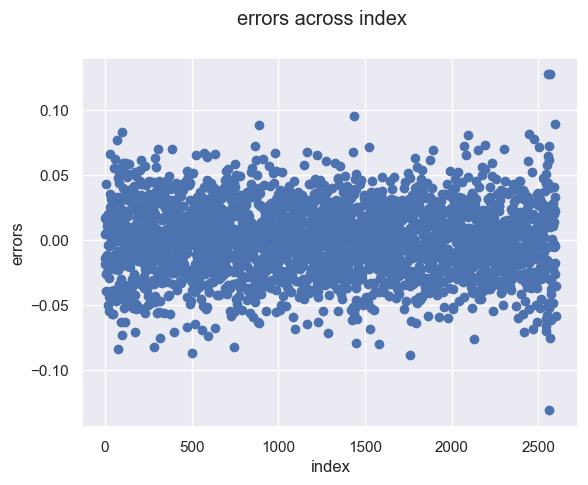

In [6]:
errors = y - y_pred
plt.scatter(x = range(len(y)), y = errors)
plt.xlabel('index')
plt.ylabel('errors')
plt.suptitle('errors across index');

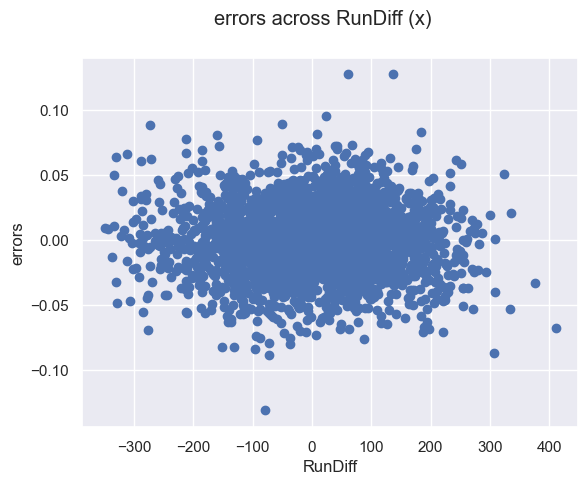

In [7]:
plt.scatter(x = x, y = errors)
plt.xlabel('RunDiff')
plt.ylabel('errors')
plt.suptitle('errors across RunDiff (x)');

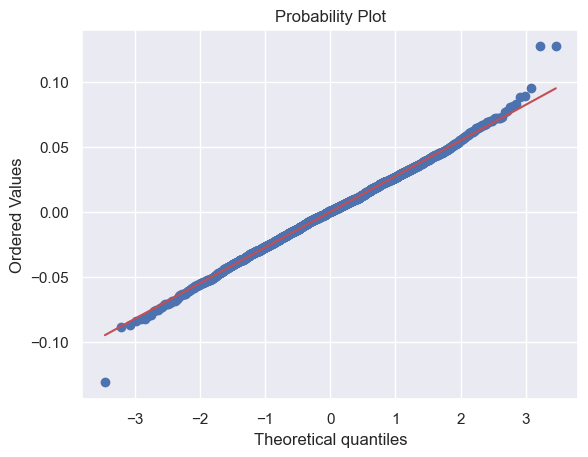

In [8]:
stats.probplot(errors, dist="norm", plot=py)
py.show()

$\color{red}{\text{Solution:}}$

The assumptions of indpendence and normality seem well met, as the first plot seems to have random scatter and the third seems to directly follow a 45-degree line (with a couple outliers). There may be a bit of concern about constant variance, but I think it generally looks okay; maybe there is a bit less variation at the lower and upper end of x, but I could see an argument for random scatter. As such, I believe this model is a relatively good one for predicting WinPCT.